# Binary Classification on MNIST: Why Accuracy Is Misleading

This notebook demonstrates why accuracy alone is an unreliable metric for 
classification problems with class imbalance, using MNIST digit classification 
(5 vs not-5) as a case study.


## Problem Framing

We frame MNIST as a binary classification task:
- Positive class: digit "5"
- Negative class: all other digits

Only ~10% of samples belong to the positive class, making this an imbalanced
classification problem.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
X.shape, y.shape

((70000, 784), (70000,))

In [5]:
y = y.astype(np.uint8)

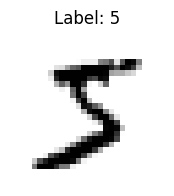

In [6]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

plt.figure(figsize=(2,2))
plt.imshow(some_digit_image, cmap="binary")
plt.title(f"Label: {y[0]}")
plt.axis("off")
plt.show()


## Baseline: A Degenerate Classifier

To illustrate the weakness of accuracy, we intentionally construct a classifier
that always predicts the majority class ("not 5").


In [7]:
y_is_5 = (y == 5)

In [8]:
np.mean(y_is_5)

np.float64(0.09018571428571429)

In [9]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y_is_5[:60000], y_is_5[60000:]

In [10]:
class Never5Classifier:
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros((len(X),), dtype=bool)


In [11]:
from sklearn.metrics import accuracy_score

never_5_clf = Never5Classifier()
never_5_clf.fit(X_train, y_train)

y_pred = never_5_clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9108

## Observation: High Accuracy Does Not Imply Usefulness

Although the classifier achieves ~90% accuracy, it fails to detect any actual
instances of the digit "5". This demonstrates that accuracy can be misleading
when classes are imbalanced.


## Error Decomposition with Confusion Matrix

To understand the failure mode of the classifier, we analyze the confusion matrix,
which separates errors into false positives and false negatives.


In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[9108,    0],
       [ 892,    0]])

Text(0.5, 1.0, 'Confusion Matrix')

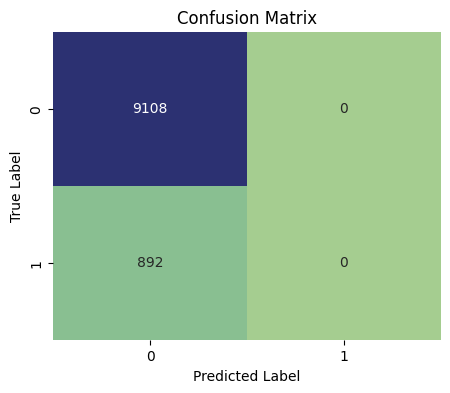

In [13]:
# Plot connfusion matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="crest", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

## Insight

The confusion matrix shows:
- Zero true positives
- All positive samples are misclassified

Despite high accuracy, the classifier is operationally useless.
